<a href="https://colab.research.google.com/github/ybae247365/mypage/blob/main/%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
!gdown 1DWc3gA8kjf7J_pmsP3fyQHcCn_DL3rc8

Downloading...
From: https://drive.google.com/uc?id=1DWc3gA8kjf7J_pmsP3fyQHcCn_DL3rc8
To: /content/iris.csv
100% 4.62k/4.62k [00:00<00:00, 16.4MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리

X = df.drop(['class'], axis=1).values # 독립변인들의 value값만 추출
# y = df['class'].values # 종속변인 추출

X = StandardScaler().fit_transform(X) # x객체에 x를 표준화한 데이터를 저장

# features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# pd.DataFrame(x, columns=features).head()

- K-Means            
K-Means는 데이터를 **군집화(클러스터링)**하기 위해 사용되며, 데이터 포인트 간의 유사성을 찾아 그룹화합니다.

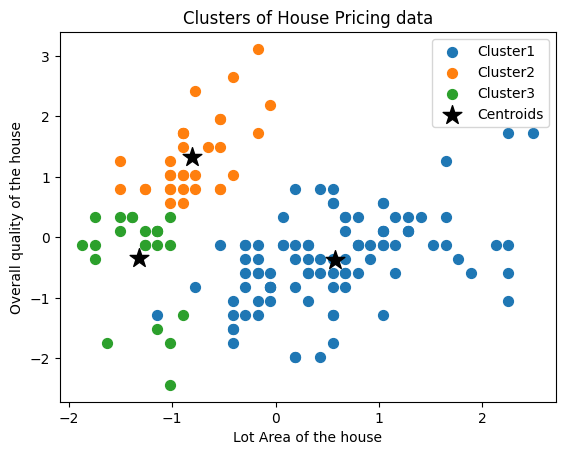

In [ ]:
# 객체 생성
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
# 모델 학습
kmeans.fit(X)
#모델 예측
y_pred = kmeans.fit_predict(X)

# 모델 예측하고 결과 그리기
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 50, c = 'C0', label = 'Cluster1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 50, c = 'C1', label = 'Cluster2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 50, c = 'C2', label = 'Cluster3')

#중심점 그리기
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s= 200, c='black', marker='*', label = 'Centroids')
plt.title('...')
plt.xlabel('Lot Area of the house')
plt.ylabel('Overall quality of the house')
plt.legend()
plt.show()

- PCA :     
https://ddongwon.tistory.com/114
   
PCA는 데이터의 차원을 축소하고, 각 주성분이 기존 변수들로부터 어떤 영향을 받는지 **pca.components_**로 확인할 수 있습니다.
PCA 그래프는 주성분(PC1, PC2)을 통해 데이터의 분포와 각 클래스 간의 관계를 시각화하는 데 유용합니다.

In [ ]:
from sklearn.decomposition import PCA

# 모델 객체 생성 - 주성분을 몇개로 할지 결정
pca = PCA(n_components=2)

printcipalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data=printcipalComponents, columns = ['PC1', 'PC2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [ ]:
principalDf.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [ ]:
# 주성분별 기존 변수의 영향 파악
print("PCA 주성분별 기존 변수 영향도:")
print(pd.DataFrame(pca.components_, columns=df.columns[:-1], index=['PC1', 'PC2']))

PCA 주성분별 기존 변수 영향도:
     sepal_length  sepal_width  petal_length  petal_width
PC1      0.522372    -0.263355      0.581254     0.565611
PC2      0.372318     0.925556      0.021095     0.065416


- PC1의 경우, PetalLength(0.58)와 PetalWidth(0.56)가 가장 큰 영향을 미쳤습니다.
- PC2에서는 SepalWidth가 0.92로 가장 큰 영향을 미칩니다.
이렇게 각 주성분이 어떤 변수에 영향을 많이 받았는지 파악하면, 주성분을 해석할 수 있습니다.

- 예를 들어:

    - PC1은 꽃잎의 크기(Petal)에 큰 영향을 받는 축.
    - PC2는 꽃받침의 너비(SepalWidth)에 민감한 축.

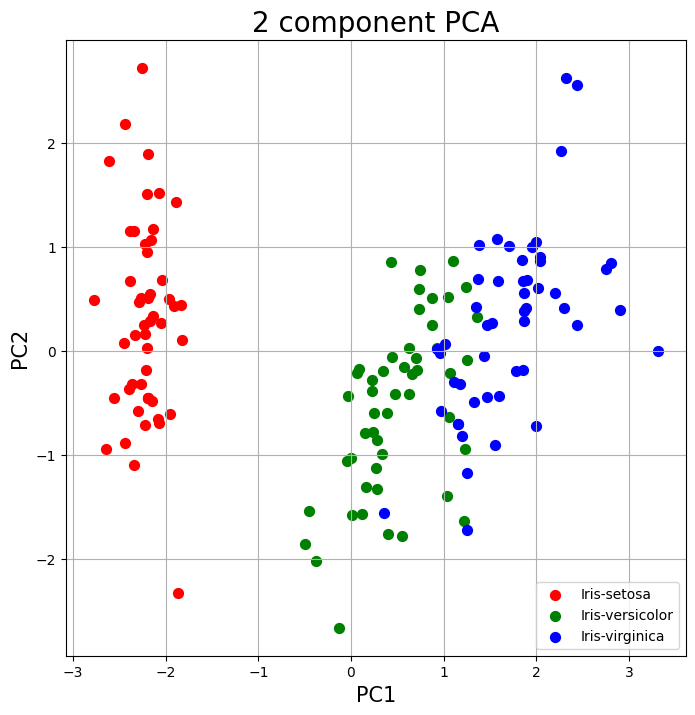

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

- PC1 (x축): 첫 번째 주성분으로, 데이터의 분산(변동성)을 가장 많이 설명하며 원래 데이터의 여러 변수들을 조합하여 가장 큰 변동을 나타내는 방향입니다.
- PC2 (y축): 두 번째 주성분으로, PC1에 직교(수직)하며 두 번째로 큰 분산을 설명하며 데이터가 PC1으로 설명되지 않는 추가적인 패턴을 포착합니다.

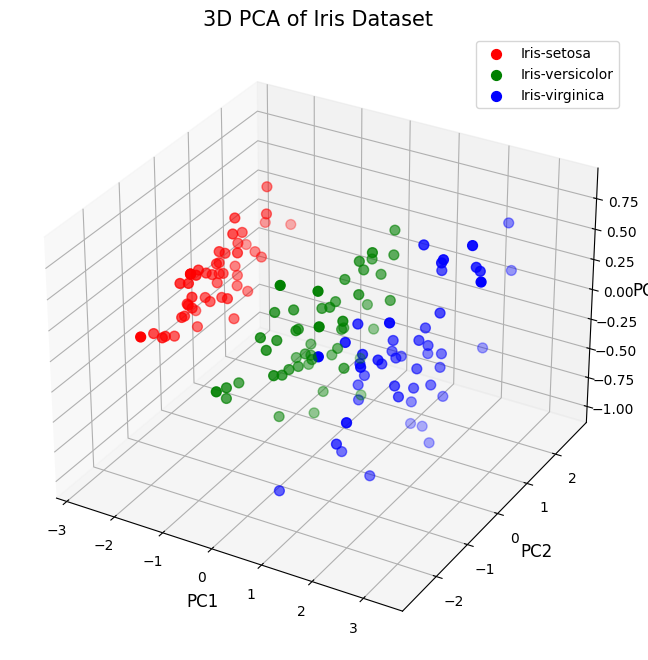

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D 그래프를 그리기 위한 모듈
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기 및 표준화
df = pd.read_csv('iris.csv')
X = df.drop(['class'], axis=1).values  # 독립 변수 추출
y = df['class'].values  # 종속 변수 추출

# 데이터 표준화
X = StandardScaler().fit_transform(X)

# PCA 수행 (주성분 3개로 축소)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

# PCA 결과를 DataFrame으로 변환
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])
finalDf = pd.concat([principalDf, df[['class']]], axis=1)

# 3D 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # 3D 축 설정

# 클래스별로 다른 색상으로 표시
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'],
               finalDf.loc[indicesToKeep, 'PC2'],
               finalDf.loc[indicesToKeep, 'PC3'],
               c=color,
               s=50,
               label=target)

# 축 및 제목 설정
ax.set_xlabel('PC1', fontsize=12)
ax.set_ylabel('PC2', fontsize=12)
ax.set_zlabel('PC3', fontsize=12)
ax.set_title('3D PCA of Iris Dataset', fontsize=15)
ax.legend(targets)
plt.show()


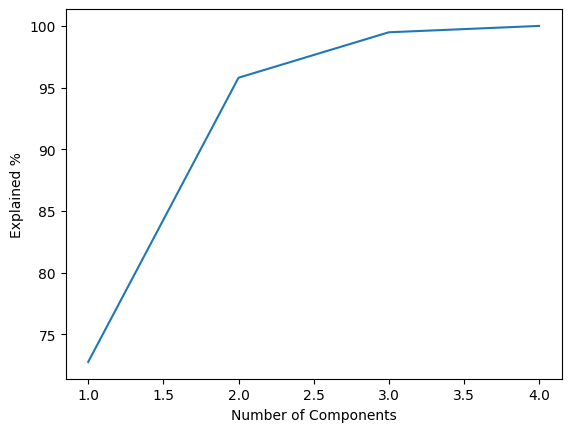

In [ ]:
import numpy as np
pca_all = PCA(n_components=4)  # 4개의 주성분으로 PCA 수행
pca_all.fit(X)  # PCA 적용

# 누적 분산 설명 비율을 그래프로 시각화
plt.plot(np.arange(1, 5), np.cumsum(pca_all.explained_variance_ratio_) * 100)
plt.xlabel("Number of Components")  # x축: 주성분 개수
plt.ylabel("Explained %")  # y축: 누적된 분산 설명 비율(%)
plt.show()


Text(0, 0.5, 'Explained %')

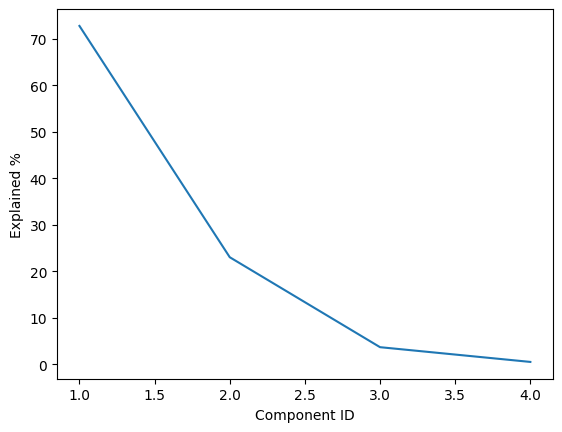

In [ ]:
plt.plot(np.arange(1, 5), pca_all.explained_variance_ratio_ * 100)
plt.xlabel("Component ID")
plt.ylabel("Explained %")